## Initialize different prompts

In [1]:
prompt_short = """You are a system that checks passport photo requirements.
Analyze the image and respond only with word 'Acceptable' or 'Unacceptable'
"""

prompt_standard = """You are a system that checks if a photo meets passport photo requirements.
Respond in exactly one of two ways:
- "Acceptable"
- "Unacceptable: <One ore more criteria>"

Criteria to consider: 
Format: Head size must be just right and be in the centre of the frame
Photo quality:  In sharp focus and clear. Neutral colour, natural skin tones, no red eyes.
Lighting: Appropriate brightness and contrast.  Balanced lighting, no shadows or flash reflections on face.
Eyes: Directly looking at the camera. Eyes open and clearly visible, no hair across the eyes.
Pose: Face must be in the centre. Portrait style and tilted positions are not acceptable. The photograph must show both sides of the face evenly
Background: Plain light-coloured (single-coloured) background. The photographed person must be shown alone with clear background
Glasses: Eyes must be showed clearly with no flash reflections on glasses.  No tinted glasses. Frames must not cover any part of the eyes.
Head coverings: Head coverings are not permitted except for religious reasons. Facial features from bottom of the chin to top of forehead and both sides of the face must be clearly shown.
Facial Expression: Facial expression must be neutral. Mouth must be closed.
"""

prompt_long = """
        You are a system that checks passport photo requirements. 
        Evaluate whether the provided photo meets the following passport photo standards:

1. **Dimensions and Format**:
   - Photo dimensions must be 5cm wide and 5cm high.
   - The face must occupy approximately 70-80% of the photo height (31-36mm from chin to top of the head).

2. **Face Position and Expression**:
   - The head must be straight, centered, and facing directly towards the camera.
   - Facial expression must be neutral with closed mouth, eyes open and clearly visible.

3. **Photo Quality**:
   - The photo must be sharp, clear, and well-focused.
   - The background should be uniform, light-colored (ideally white or light grey), with no patterns or shadows.
   - Lighting should be evenly distributed without reflections, shadows, or red-eye.

4. **Eyes and Glasses**:
   - Eyes must be clearly visible and not obscured by hair or glasses.
   - Glasses are permitted only if lenses are clear and free of glare, reflections, or shadows.
   - Sunglasses or tinted lenses are prohibited.

5. **Head Coverings and Accessories**:
   - Head coverings are only permitted for religious or medical reasons and must not obscure facial features.
   - No accessories or hair coverings should obscure the outline of the face.

6. **Clothing and Appearance**:
   - Clothing should contrast clearly with the background.
   - Military, police, or uniformed attire should not be visible.

7. **Other Considerations**:
   - The photo must represent current appearance, ideally taken within the past 6 months.
   - There must be no visible edits, filters, or digital alterations.

Provide a structured assessment clearly indicating compliance or non-compliance with each guideline.

Here is a template of ypur response:
This photo is (Acceptable|Unacceptable).
Here is an evaluation of the 7 criterias:
<beforementioned criteria>
"""

## Prepare the test dataset

In [5]:
from src.utils import Utils

photos = Utils.get_dataset_data("test")

2025-05-08 20:05:19.066039: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-08 20:05:19.077306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746727519.089185  186501 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746727519.092832  186501 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746727519.103927  186501 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

A total of 30 photos were loaded as small-test dataset. Of which, 15 are acceptable and 15 are unacceptable


## Initialize the bare model

In [6]:
from src.LlavaNextModel import LlavaNextModel

model = LlavaNextModel("llava-hf/llava-v1.6-vicuna-13b-hf")

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


## Short prompt test

Classifying Photos: 100%|██████████| 30/30 [00:17<00:00,  1.72it/s]


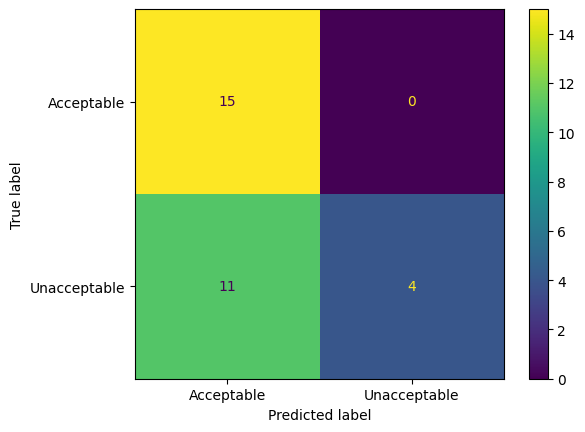

{'Accuracy': 0.6333333333333333, 'Precision': 0.5769230769230769, 'Recall': 1.0, 'F1_score': 0.7317073170731707}


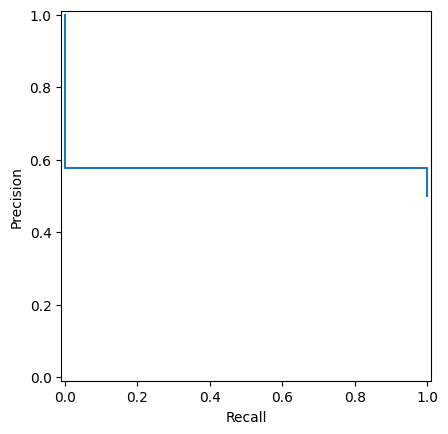

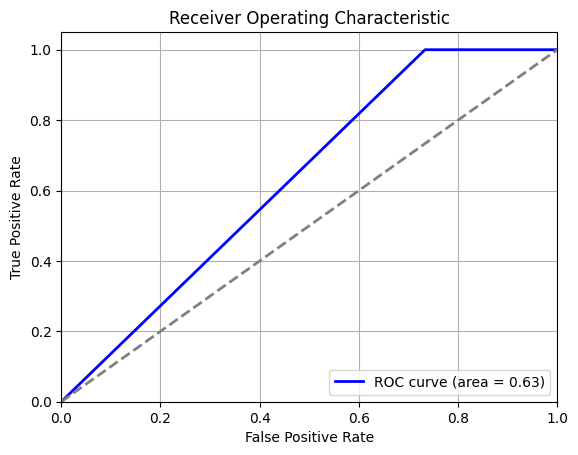

FP ./data/small-test/unacceptable/29.png Acceptable
FP ./data/small-test/unacceptable/30.png Acceptable
FP ./data/small-test/unacceptable/40.png Acceptable
FP ./data/small-test/unacceptable/58.png Acceptable
FP ./data/small-test/unacceptable/66.jpg Acceptable
FP ./data/small-test/unacceptable/83.png Acceptable
FP ./data/small-test/unacceptable/84.png Acceptable
FP ./data/small-test/unacceptable/94.png Acceptable
FP ./data/small-test/unacceptable/106.png Acceptable
FP ./data/small-test/unacceptable/115.png Acceptable
FP ./data/small-test/unacceptable/116.png Acceptable


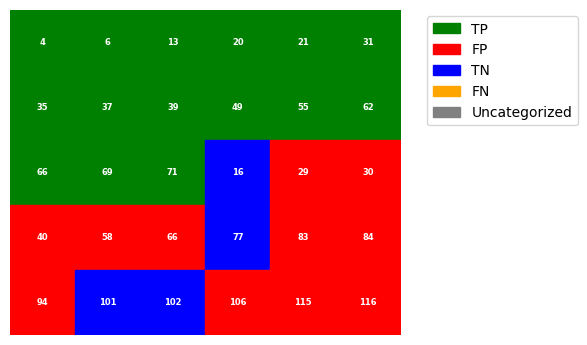

In [7]:
Utils.eval(model.evaluate, photos, prompt_short)

## Medium prompt test

Classifying Photos: 100%|██████████| 30/30 [00:46<00:00,  1.56s/it]


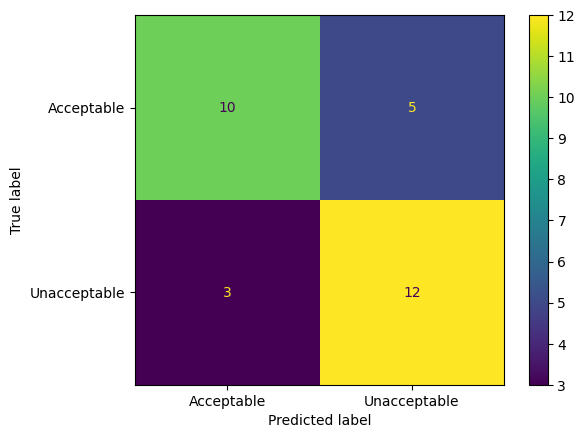

{'Accuracy': 0.7333333333333333, 'Precision': 0.7692307692307693, 'Recall': 0.6666666666666666, 'F1_score': 0.7142857142857143}


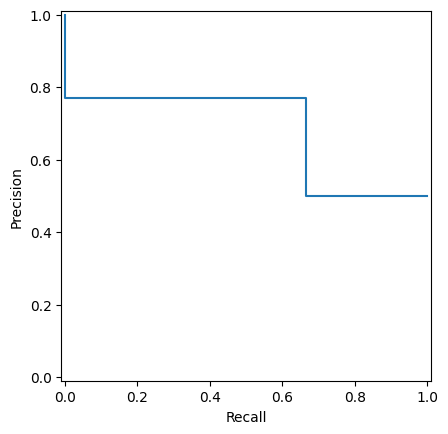

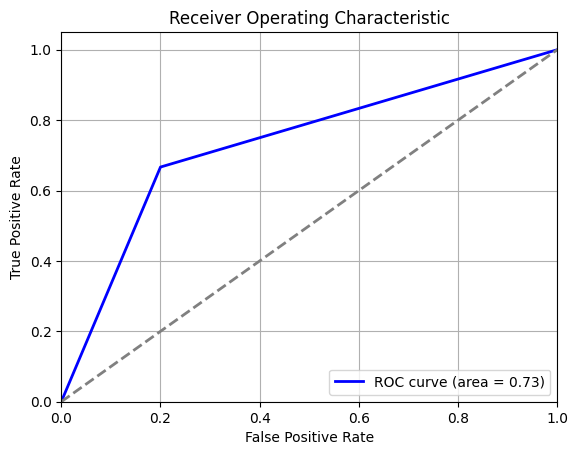

FN ./data/small-test/acceptable/13.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/20.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/21.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/62.png Unacceptable: Background
FN ./data/small-test/acceptable/71.png Unacceptable: Background
FP ./data/small-test/unacceptable/40.png Acceptable
FP ./data/small-test/unacceptable/58.png Acceptable
FP ./data/small-test/unacceptable/115.png Acceptable


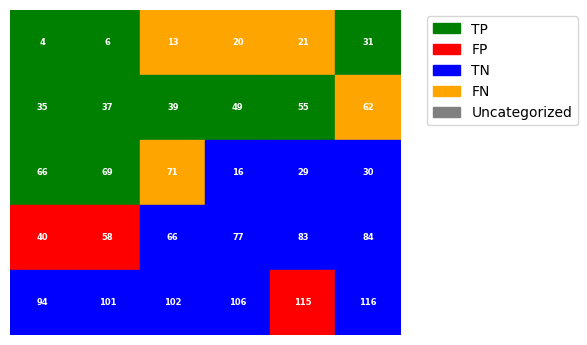

In [8]:
Utils.eval(model.evaluate, photos, prompt_standard)

## Long prompt test

Classifying Photos: 100%|██████████| 30/30 [08:18<00:00, 16.63s/it]


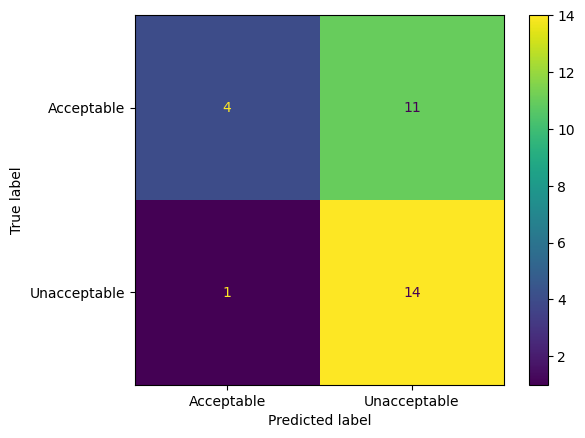

{'Accuracy': 0.6, 'Precision': 0.8, 'Recall': 0.26666666666666666, 'F1_score': 0.4}


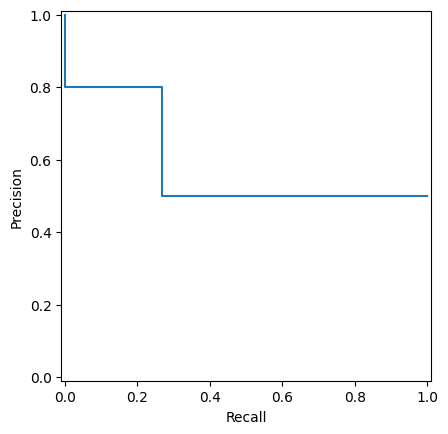

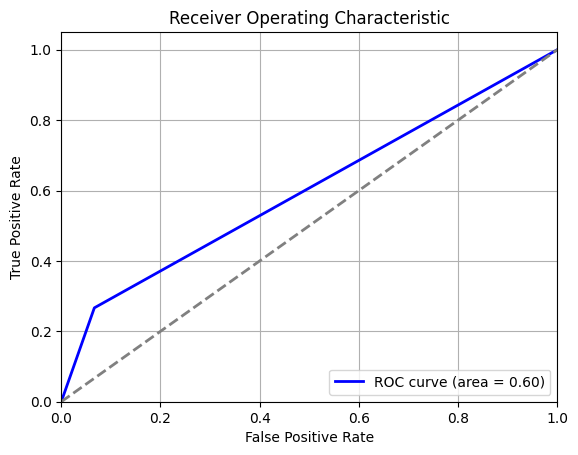

FN ./data/small-test/acceptable/4.png This photo is Unacceptable.

1. Dimensions and Format: The photo dimensions are 35mm wide and 45mm high, which is within the passport photo standards. However, the face does not occupy approximately 70-80% of the photo height, as it is slightly smaller than the required range.

2. Face Position and Expression: The head is straight and centered, but it is not facing directly towards the camera. The face is not fully visible due to the angle of the photo.

3. Photo Quality: The photo is not sharp, clear, or well-focused. The background is not uniform, light-colored, or free of shadows.

4. Eyes and Glasses: The eyes are not clearly visible, as they are partially obscured by the hair.

5. Head Coverings and Accessories: There are no head coverings or accessories visible in the photo.

6. Clothing and Appearance: The clothing contrasts clearly with the background, and there are no visible edits, filters, or digital alterations.

7. Other Considerations

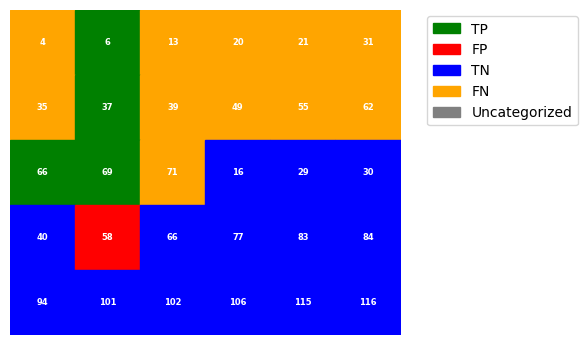

In [9]:
Utils.eval(model.evaluate, photos, prompt_long)